<a href="https://colab.research.google.com/github/GabiCaffe/Alura-Store---desafio/blob/main/Alura%20Store%20-%20Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



En este primer ánalisis se llevo acabo el calculo de la facturación total de cada tienda.

In [31]:
#Para tener a mano los nombres de cada columna
print(tienda.columns)

# Agregar el nombre de la tienda a cada DataFrame antes de concatenarlos
tienda['nombre_tienda'] = 'Tienda 1'
tienda2['nombre_tienda'] = 'Tienda 2'
tienda3['nombre_tienda'] = 'Tienda 3'
tienda4['nombre_tienda'] = 'Tienda 4'


Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'nombre_tienda'],
      dtype='object')


In [46]:
#Realizo la suma total de ingresos de cada tienda

ingresoTotal_T1 = tienda['Precio'].sum()
ingresoTotal_T2 = tienda2['Precio'].sum()
ingresoTotal_T3 = tienda3['Precio'].sum()
ingresoTotal_T4 = tienda4['Precio'].sum()


print(f"La facturación total de la tienda 1 es de: ${ingresoTotal_T1:,.2f}")
print(f"La facturación total de la tienda 2 es de: ${ingresoTotal_T2:,.2f}")
print(f"La facturación total de la tienda 3 es de: ${ingresoTotal_T3:,.2f}")
print(f"La facturación total de la tienda 4 es de: ${ingresoTotal_T4:,.2f}")

La facturación total de la tienda 1 es de: $1,150,880,400.00
La facturación total de la tienda 2 es de: $1,116,343,500.00
La facturación total de la tienda 3 es de: $1,098,019,600.00
La facturación total de la tienda 4 es de: $1,038,375,700.00


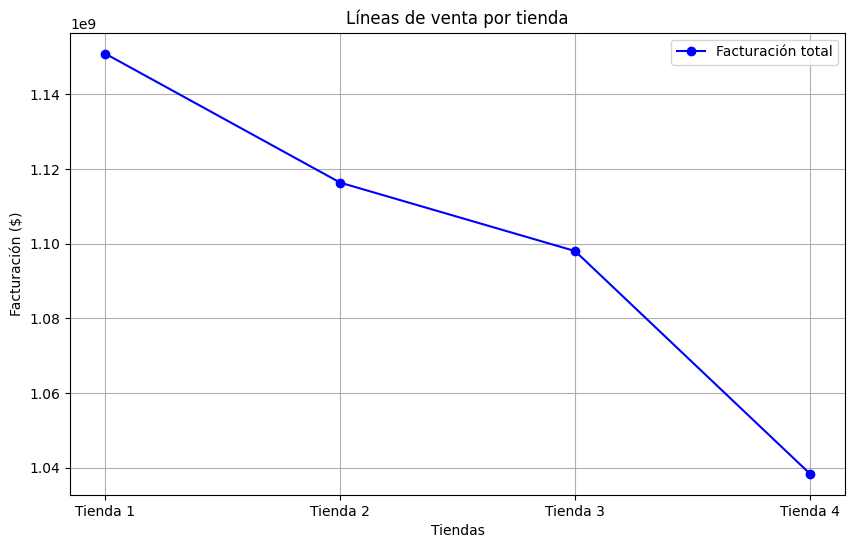

In [86]:
# Datos de facturación por tienda
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
facturacion = [ingresoTotal_T1, ingresoTotal_T2, ingresoTotal_T3, ingresoTotal_T4]

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(tiendas, facturacion, marker='o', linestyle='-', color='b', label="Facturación total")

# Configurar etiquetas y título
plt.xlabel("Tiendas")
plt.ylabel("Facturación ($)")
plt.title("Líneas de venta por tienda")
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.show()



# 2. Ventas por categoría

Se calculo la cantidad de productos vendidos por categoría en cada tienda. Se agrupo los datos por categoría y conto el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [68]:
# Concatenar todas las tiendas en un solo DataFrame
todas_las_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])

# Agrupar por tienda y categoría, contando el número de ventas
ventas_por_categoria = todas_las_tiendas.groupby(['nombre_tienda', 'Categoría del Producto']).size()

# Ordenar las categorías más populares dentro de cada tienda
ventas_por_categoria = ventas_por_categoria.groupby(level=0, group_keys=False).nlargest()

# Mostrar los resultados
for nombre_tienda in todas_las_tiendas['nombre_tienda'].unique():
    print(f"\n {nombre_tienda}")
    categorias = ventas_por_categoria.loc[nombre_tienda]
    for categoria, cantidad in categorias.items():
        print(f"- {categoria}: {cantidad} ventas")



 Tienda 1
- Muebles: 465 ventas
- Electrónicos: 448 ventas
- Juguetes: 324 ventas
- Electrodomésticos: 312 ventas
- Deportes y diversión: 284 ventas

 Tienda 2
- Muebles: 442 ventas
- Electrónicos: 422 ventas
- Juguetes: 313 ventas
- Electrodomésticos: 305 ventas
- Deportes y diversión: 275 ventas

 Tienda 3
- Muebles: 499 ventas
- Electrónicos: 451 ventas
- Juguetes: 315 ventas
- Electrodomésticos: 278 ventas
- Deportes y diversión: 277 ventas

 Tienda 4
- Muebles: 480 ventas
- Electrónicos: 451 ventas
- Juguetes: 338 ventas
- Deportes y diversión: 277 ventas
- Electrodomésticos: 254 ventas


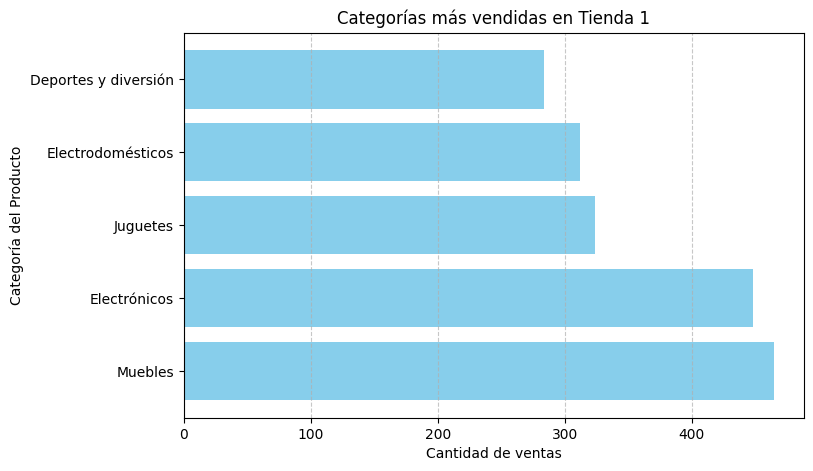

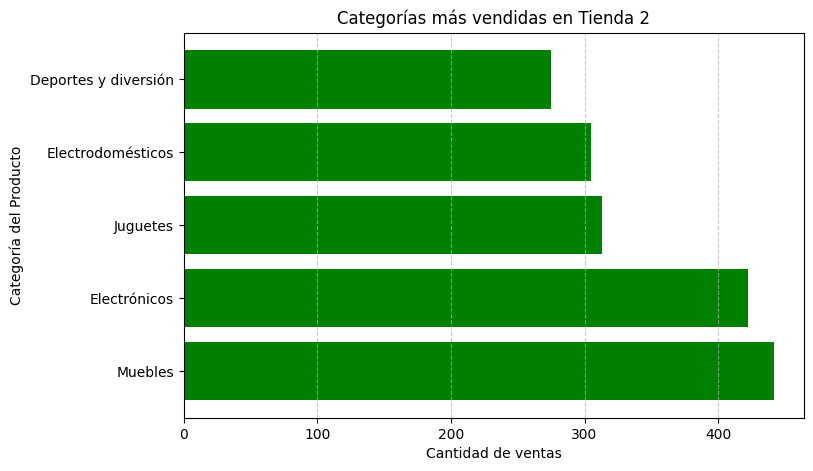

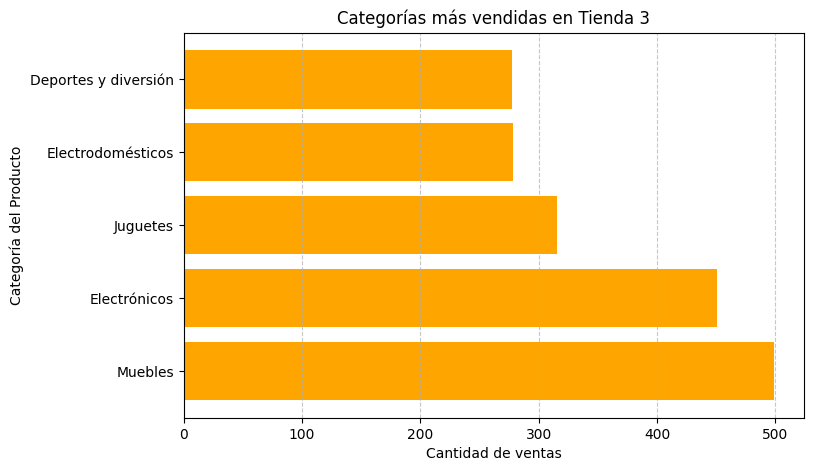

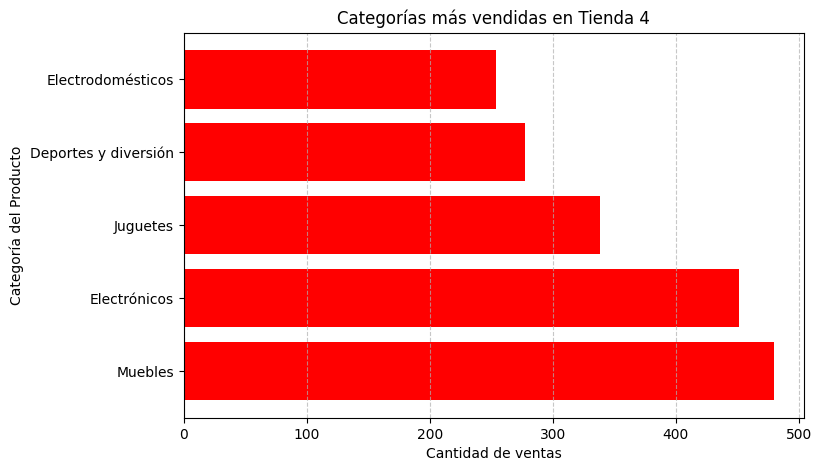

In [90]:
# Lista de colores
colores = ["skyblue", "green", "orange", "red"]

# Iterar sobre cada tienda y asignar un color distinto
for i, tienda_nombre in enumerate(todas_las_tiendas['nombre_tienda'].unique()):
    categorias = ventas_por_categoria.loc[tienda_nombre]

    # Configurar el gráfico con el color correspondiente
    plt.figure(figsize=(8,5))
    plt.barh(categorias.index, categorias.values, color=colores[i % len(colores)])

    # Personalizar etiquetas y título
    plt.xlabel("Cantidad de ventas")
    plt.ylabel("Categoría del Producto")
    plt.title(f"Categorías más vendidas en {tienda_nombre}")
    plt.grid(axis="x", linestyle="--", alpha=0.7)

    # Mostrar el gráfico
    plt.show()



# 3. Calificación promedio de la tienda


Aquí se realizo la calificación promedio que recibio cada tienda.

In [62]:

# Agrupar por tienda y calcular el promedio de calificaciones
calificacion_promedio = todas_las_tiendas.groupby('nombre_tienda')['Calificación'].mean().round(2)

# Iterar sobre cada tienda y mostrar su clasificación promedio
for nombre_tienda, calificacion in calificacion_promedio.items():
    print(f"La clasificación promedio de la {nombre_tienda} es: {calificacion:.2f}")

La clasificación promedio de la Tienda 1 es: 3.98
La clasificación promedio de la Tienda 2 es: 4.04
La clasificación promedio de la Tienda 3 es: 4.05
La clasificación promedio de la Tienda 4 es: 4.00


(np.float64(-1.1000000119139237),
 np.float64(1.0999999824988684),
 np.float64(-1.099999972753785),
 np.float64(1.0999999987025613))

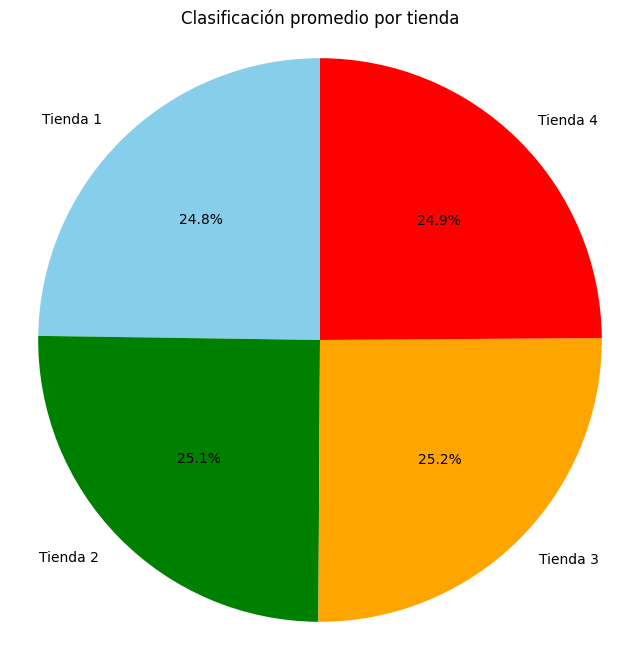

In [91]:
# Definir los colores específicos para cada tienda
colores = ["skyblue", "green", "orange", "red"]

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(calificacion_promedio, labels=calificacion_promedio.index, autopct="%1.1f%%", colors=colores, startangle=90)

# Configurar título y mejorar visualización
plt.title("Clasificación promedio por tienda")
plt.axis("equal")  # Mantiene la proporción del gráfico

# Mostrar el gráfico


# 4. Productos más y menos vendidos

In [79]:
#Contar la cantidad de ventas por cada producto
ventas_por_producto = todas_las_tiendas.groupby(['nombre_tienda', 'Producto']).size()

#Identificar los productos mas y menos vendidos
productos_mas_vendidos = ventas_por_producto.groupby(level=0).nlargest(5)  # Top 5 más vendidos
productos_menos_vendidos = ventas_por_producto.groupby(level=0).nsmallest(5)  # Top 5 menos vendidos

#Mostrar
for tienda_nombre in todas_las_tiendas['nombre_tienda'].unique():
    print("\n {}".format(tienda_nombre))

    # Productos más vendidos
    print("Productos más vendidos:")
    for producto, cantidad in productos_mas_vendidos.loc[tienda_nombre].items():
        print("- {}: {} ventas".format(producto, cantidad))

    # Productos menos vendidos
    print("\nProductos menos vendidos:")
    for producto, cantidad in productos_menos_vendidos.loc[tienda_nombre].items():
        print("- {}: {} ventas".format(producto, cantidad))



 Tienda 1
Productos más vendidos:
- ('Tienda 1', 'Armario'): 60 ventas
- ('Tienda 1', 'Microondas'): 60 ventas
- ('Tienda 1', 'TV LED UHD 4K'): 60 ventas
- ('Tienda 1', 'Secadora de ropa'): 58 ventas
- ('Tienda 1', 'Bloques de construcción'): 56 ventas

Productos menos vendidos:
- ('Tienda 1', 'Auriculares con micrófono'): 33 ventas
- ('Tienda 1', 'Celular ABXY'): 33 ventas
- ('Tienda 1', 'Olla de presión'): 35 ventas
- ('Tienda 1', 'Pandereta'): 36 ventas
- ('Tienda 1', 'Ciencia de datos con Python'): 39 ventas

 Tienda 2
Productos más vendidos:
- ('Tienda 2', 'Iniciando en programación'): 65 ventas
- ('Tienda 2', 'Microondas'): 62 ventas
- ('Tienda 2', 'Batería'): 61 ventas
- ('Tienda 2', 'Guitarra acústica'): 58 ventas
- ('Tienda 2', 'Pandereta'): 58 ventas

Productos menos vendidos:
- ('Tienda 2', 'Juego de mesa'): 32 ventas
- ('Tienda 2', 'Impresora'): 34 ventas
- ('Tienda 2', 'Mesa de comedor'): 34 ventas
- ('Tienda 2', 'Sillón'): 35 ventas
- ('Tienda 2', 'Auriculares'): 37 vent

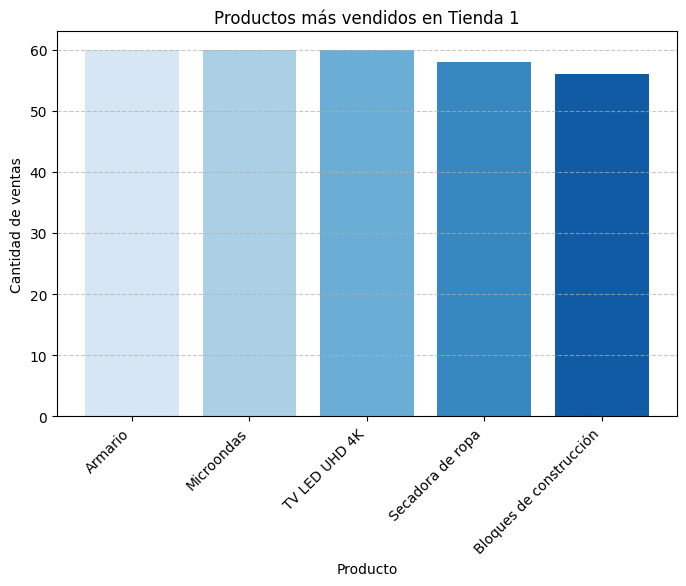

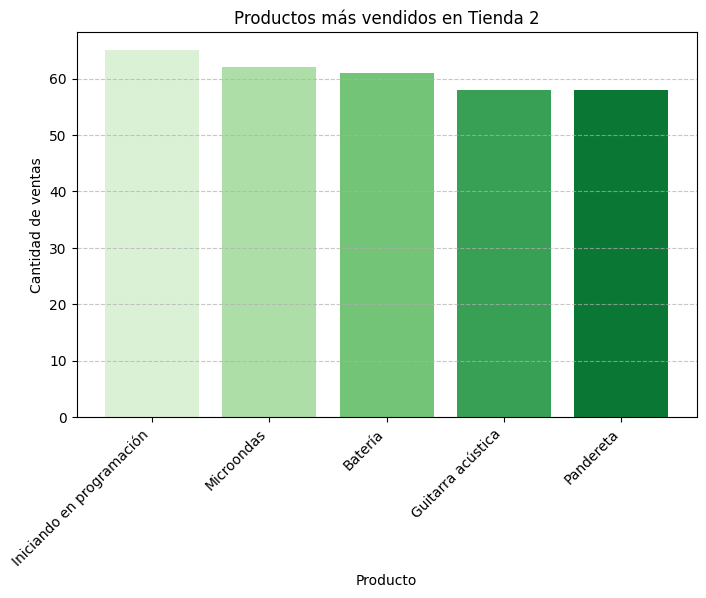

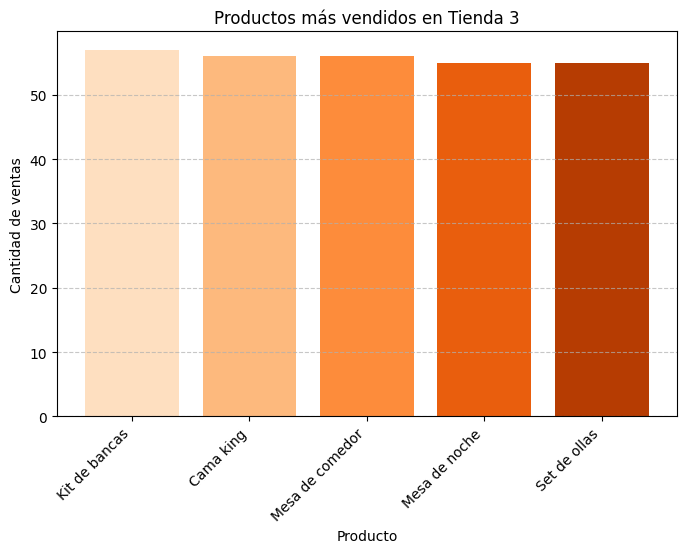

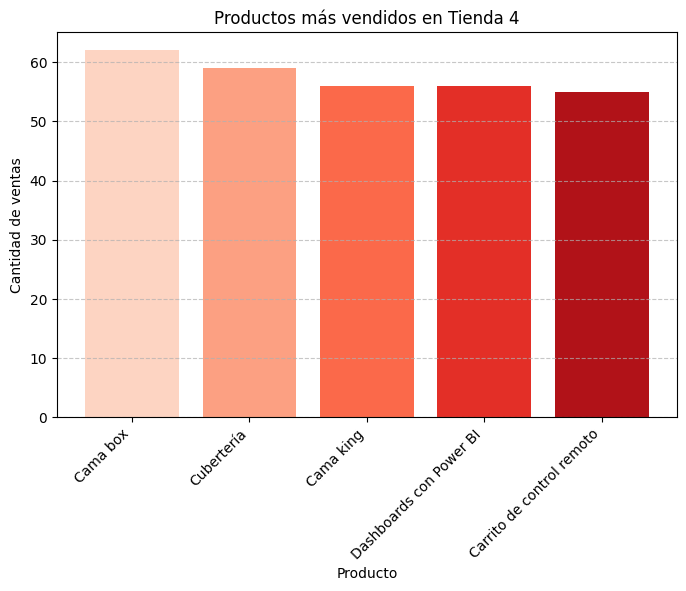

In [95]:
# Lista de colores asignados a cada tienda
colores_tienda = {
    "Tienda 1": "Blues",
    "Tienda 2": "Greens",
    "Tienda 3": "Oranges",
    "Tienda 4": "Reds"
}

# Iterar sobre cada tienda y generar su gráfico de barras con colores dinámicos
for tienda_nombre in todas_las_tiendas['nombre_tienda'].unique():
    if tienda_nombre in productos_mas_vendidos.index:
        categorias_mas_vendidas = productos_mas_vendidos.loc[tienda_nombre].reset_index()

        # Crear la paleta de colores basada en la gama de la tienda
        colores = sns.color_palette(colores_tienda[tienda_nombre], len(categorias_mas_vendidas))

        fig, ax = plt.subplots(figsize=(8,5))

        # Gráfico de los productos más vendidos con colores distintos por producto
        ax.bar(categorias_mas_vendidas["Producto"], categorias_mas_vendidas[0], color=colores)

        # Personalizar etiquetas y título
        plt.xlabel("Producto")
        plt.ylabel("Cantidad de ventas")
        plt.title(f"Productos más vendidos en {tienda_nombre}")
        plt.xticks(rotation=45, ha="right")
        plt.grid(axis="y", linestyle="--", alpha=0.7)

        # Mostrar el gráfico
        plt.show()



# 5. Envío promedio por tienda

In [75]:
# Agrupar por tienda y calcular el costo de envío promedio
costo_envio_promedio = todas_las_tiendas.groupby('nombre_tienda')['Costo de envío'].mean()

# Mostrar los resultados
for nombre_tienda, costo in costo_envio_promedio.items():
    print(f"El costo promedio de envío de la {nombre_tienda} es: ${costo:,.2f}")

El costo promedio de envío de la Tienda 1 es: $26,018.61
El costo promedio de envío de la Tienda 2 es: $25,216.24
El costo promedio de envío de la Tienda 3 es: $24,805.68
El costo promedio de envío de la Tienda 4 es: $23,459.46
